In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Loading Dataset

In [2]:
df=pd.read_csv("stroke.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5108 non-null object
age                  5106 non-null float64
hypertension         5109 non-null float64
heart_disease        5110 non-null int64
ever_married         5108 non-null object
work_type            5107 non-null object
Residence_type       5108 non-null object
avg_glucose_level    5109 non-null float64
bmi                  4909 non-null float64
smoking_status       5104 non-null object
stroke               5110 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 479.1+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5106.000000,5109.000000,5110.000000,5109.000000,4909.000000,5110.000000
mean,36517.829354,43.208186,0.097475,0.054012,106.155060,28.893237,0.048728
std,21161.721625,22.607195,0.296633,0.226063,45.284917,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.260000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.890000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 2
age                    4
hypertension           1
heart_disease          0
ever_married           2
work_type              3
Residence_type         2
avg_glucose_level      1
bmi                  201
smoking_status         6
stroke                 0
dtype: int64

In [7]:
df['gender']=df['gender'].map({'Male':0,'Female':1})
df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})
df['work_type'] =df['work_type'].map({'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4})
df['Residence_type']=df['Residence_type'].map({'Urban':0,'Rural':1})
df['smoking_status'] =df['smoking_status'] .map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0.0,1,1.0,0.0,0.0,228.69,36.6,2.0,1
1,51676,1.0,61.0,0.0,0,1.0,1.0,1.0,202.21,NaN,0.0,1
2,31112,0.0,80.0,0.0,1,1.0,0.0,1.0,105.92,32.5,0.0,1
3,60182,1.0,49.0,0.0,0,1.0,0.0,0.0,171.23,34.4,3.0,1
4,1665,1.0,79.0,1.0,0,1.0,1.0,1.0,174.12,24.0,0.0,1


In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0.0,1,1.0,0.0,0.0,228.69,36.600000,2.0,1
1,51676,1.0,61.0,0.0,0,1.0,1.0,1.0,202.21,28.893237,0.0,1
2,31112,0.0,80.0,0.0,1,1.0,0.0,1.0,105.92,32.500000,0.0,1
3,60182,1.0,49.0,0.0,0,1.0,0.0,0.0,171.23,34.400000,3.0,1
4,1665,1.0,79.0,1.0,0,1.0,1.0,1.0,174.12,24.000000,0.0,1


In [11]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Data Visualization

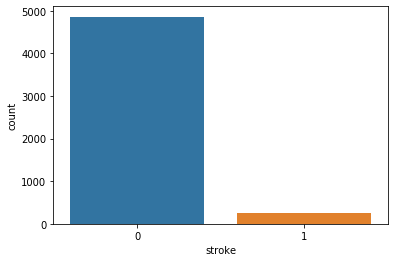

In [12]:
sb.countplot(x="stroke", data=df)
plt.show()

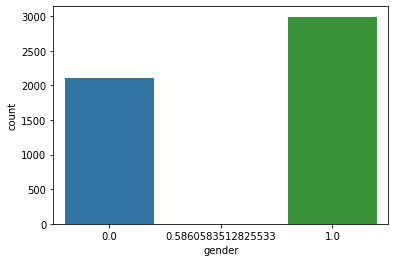

In [13]:
sb.countplot(x="gender", data=df)
plt.show()

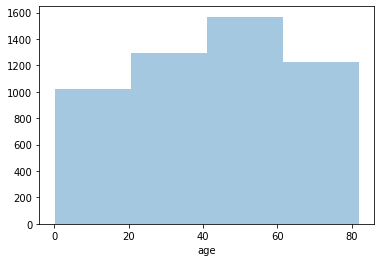

In [14]:
sb.distplot(df['age'], bins=4, kde=False)

In [15]:
Count_hadnot_stroke=len(df[df.stroke==0])
Count_had_stroke=len(df[df.stroke==1])
print("percentage of Patients hadn't stroke :{:.2f}%".format((Count_hadnot_stroke/(len(df.stroke))*100)))
print("percentage of Patients had stroke :{:.2f}%".format((Count_had_stroke/(len(df.stroke))*100)))

percentage of Patients hadn't stroke :95.13%
percentage of Patients had stroke :4.87%


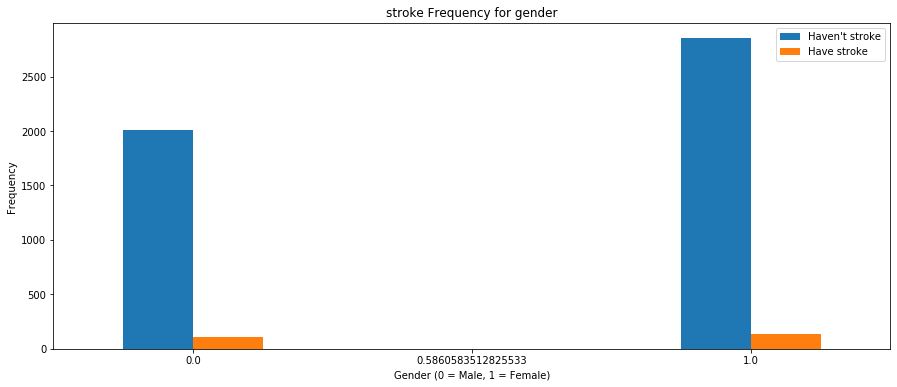

In [16]:
pd.crosstab(df.gender,df.stroke).plot(kind="bar",figsize=(15,6))
plt.title('stroke Frequency for gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.xticks(rotation=0)
plt.legend(["Haven't stroke", "Have stroke"])
plt.ylabel('Frequency')
plt.show()

### Correlation Analysis

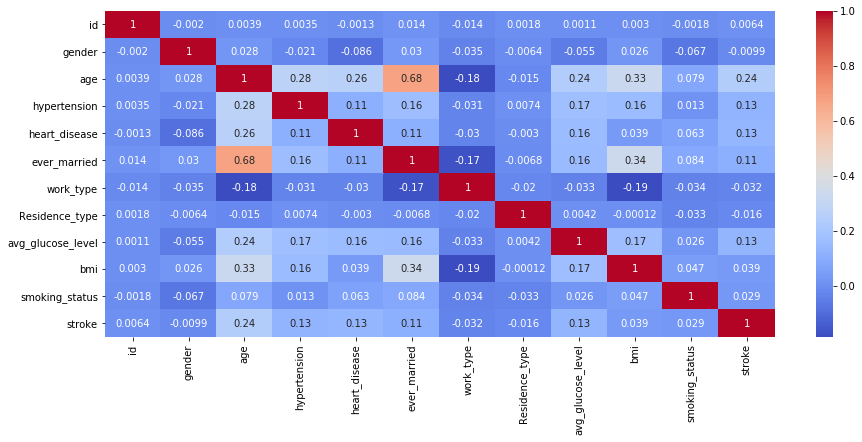

In [17]:
co=df.corr()
plt.figure(figsize=(15,6))
sb.heatmap(co,cmap="coolwarm",annot=True)

#####  From the above correlation heat map, we can conclude that :-
- stroke and age variable are positively correlated (correlation coefficient = 0.24).
- stroke and gender variable are negatively correlated (correlation coefficient = -0.0099).

### splitting Dataset

In [18]:
X = df.drop(["stroke"], axis=1)
y = df["stroke"]

In [19]:
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (5110, 11)
Shape of y: (5110,)


In [20]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.3)
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3577, 11)
Shape of x_test : (1533, 11)
Shape of y_train : (3577,)
Shape of y_test : (1533,)


## Logistic Regression
- I am using logistic regression beacuse it is classification problem.
- It predict discrete values.

In [22]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

### Train and test model

In [23]:
log.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predict=log.predict(x_test)

### Measure Accuracy

In [25]:
print("Training Accuracy :", log.score(x_train, y_train))
print("Testing Accuracy :", log.score(x_test, y_test))

Training Accuracy : 0.9468828627341348
Testing Accuracy : 0.958904109589041


In [26]:
from sklearn.metrics import classification_report
print('Logistic Regression Classification_report:\n')
print(classification_report(y_test,predict))

Logistic Regression Classification_report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1473
           1       0.00      0.00      0.00        60

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.92      0.96      0.94      1533



In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predict)
cnf_matrix

array([[1470,    3],
       [  60,    0]], dtype=int64)

### Plot Line Graph

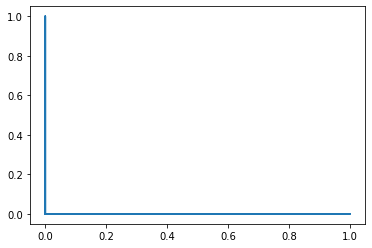

In [28]:
plt.plot(y_test, predict)
plt.show()

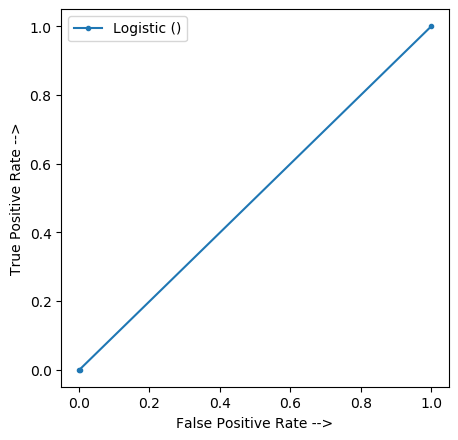

In [29]:
from sklearn.metrics import roc_curve

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, predict)
plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic ()')

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()